In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
dob = datetime.date(1988, 9, 25)
today = datetime.date.today()
days = (today - dob).days
weeks = (today - dob).days/7
years = (today - dob).days/365

weeks_max = 80*52
weeks_rem = weeks_max - round(weeks)                       

In [3]:
weeks_cal = np.vstack((np.ones((round(weeks),1)), 
                       np.zeros((weeks_rem,1)) ))

df_cal = pd.DataFrame(data=weeks_cal.reshape(-1,52), 
                      index=range(1,81), 
                      columns=[str(wk) for wk in range(1,53)])

In [109]:
### TO ADD YEARS LABELS 
df_cal['years']=range(dob.year,dob.year+80)
# reorder columns
cols = list(df_cal)   # get list of columns
cols.insert(0, cols.pop(cols.index('years')))   # move 'years' column to head of list using index, pop and insert
df_cal = df_cal.loc[:, cols]   # use ix to reorder dataframe
df_cal

In [120]:
# melting the dataframe (vertical restruct.)
df_cal_melt = pd.melt(df_cal, id_vars=['years'], var_name='week', value_name='values', ignore_index=False)
df_cal_melt.head(3)

,years,week,values
1,1988,1,1.0
2,1989,1,1.0
3,1990,1,1.0


#### Test con matplotlib

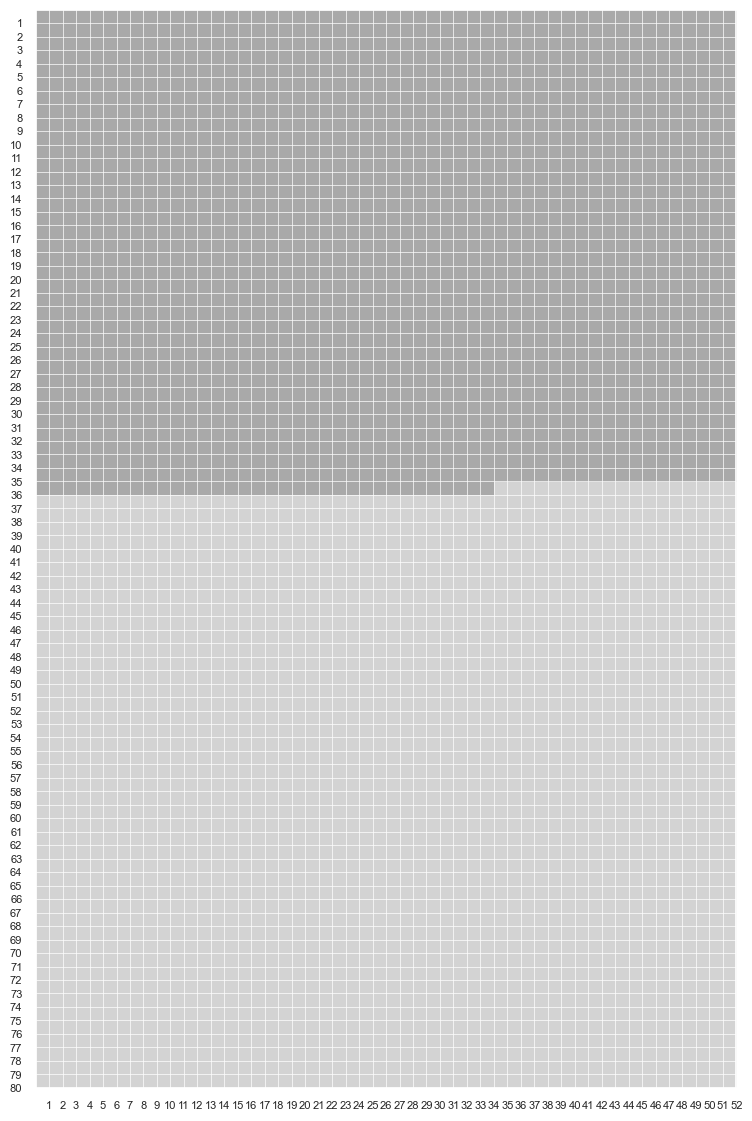

In [205]:
data = df_cal.to_numpy()

# create discrete colormap
cmap = colors.ListedColormap(['lightgrey', 'darkgrey'])
bounds = [0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
#fig.set_size_inches(16, 14)
plt.rcParams["figure.figsize"] = (16,14)
#plt.rcParams.update({'font.size': 8})
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='w', linewidth=0.5)
ax.set_xticks(np.arange(0.5, 52.5, 1), labels=np.arange(1, 53, 1), rotation='horizontal');
ax.set_yticks(np.arange(0.5, 80.5, 1), labels=np.arange(1, 81, 1), position=(0,-1));

plt.show()

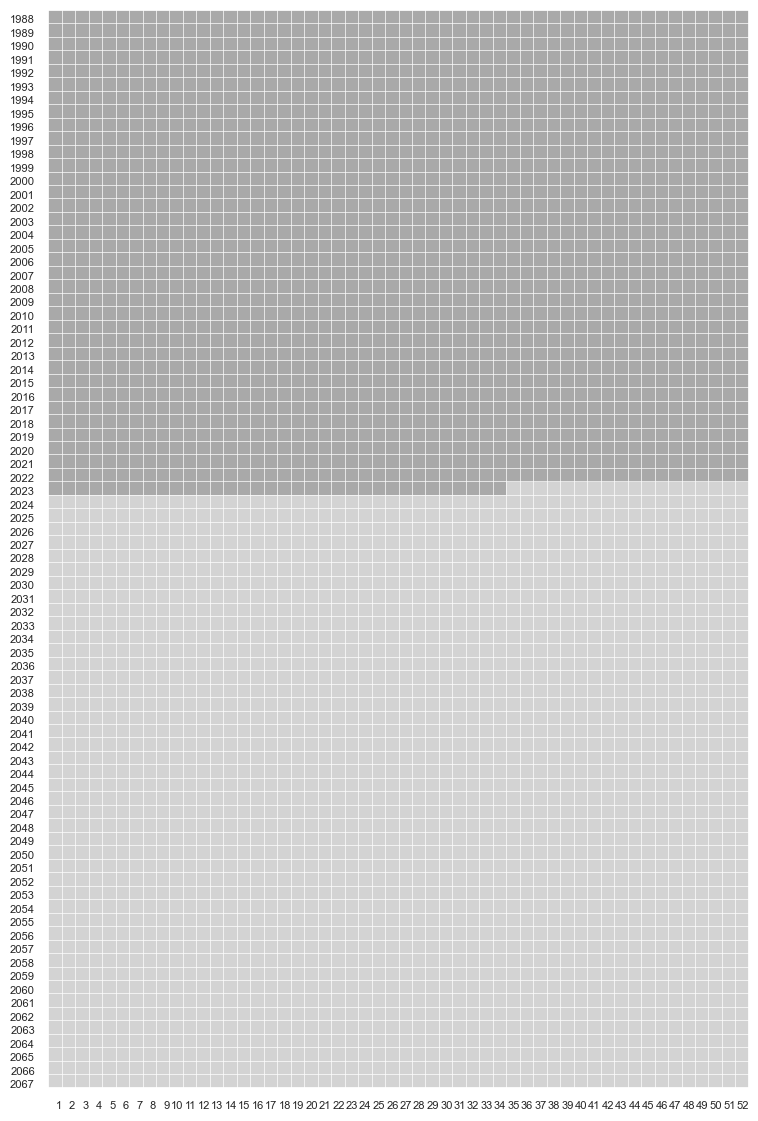

In [255]:
data = df_cal.to_numpy()

# create discrete colormap
cmap = colors.ListedColormap(['lightgrey', 'darkgrey'])
bounds = [0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='w', linewidth=0.5)
ax.set_xticks(np.arange(0.5, 52.5, 1), labels=np.arange(1, 53, 1), ha='right');
ax.set_yticks(np.arange(0.5, 80.5, 1), labels=np.arange(dob.year, dob.year+80, 1), va='baseline');

# Set tick positions slightly back from the gridlines
#ax.set_xticks(np.arange(0.45, 52.45, 1))
#ax.set_yticks(np.arange(0.45, 80.45, 1))

# Set tick labels at desired positions
#ax.set_xticklabels(np.arange(1, 53, 1), rotation='horizontal', ha='right')
#ax.set_yticklabels(np.arange(1, 81, 1), position=(0, -0.15), va='baseline')


plt.show()

#### Test con Plotly

In [29]:
import plotly.express as px

cell_size = 15
row_title_width = 50
width = cell_size*len(df_cal.columns) + row_title_width
height = cell_size*len(df_cal.index)

fig = px.imshow(df_cal, width=width, height=height, color_continuous_scale=['lightgrey', 'darkgrey'])

for i in range(len(df_cal.columns)):
    fig.add_shape(type="line", x0=0.5 + i, y0=0.5, x1=0.5 + i, y1=len(df_cal.index) + 0.5, line=dict(color="white", width=1))

for i in range(len(df_cal.index)):
    fig.add_shape(type="line", x0=-0.5, y0=0.5 + i, x1=len(df_cal.columns) - 0.5, y1=0.5 + i, line=dict(color="white", width=1))


fig.show()